In [412]:
# Import necessary libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

In [233]:
# Load data into a pandas DataFrame
df = pd.read_csv('data1.csv')

In [70]:

#display table
print(df)

      Row ID      Tweet ID    Username  \
0          1  1.630170e+18  MailOnline   
1          2  1.630170e+18  MailOnline   
2          3  1.630170e+18  MailOnline   
3          4  1.630160e+18  MailOnline   
4          5  1.630150e+18  MailOnline   
...      ...           ...         ...   
3229    3230  1.622760e+18  MailOnline   
3230    3231  1.622750e+18  MailOnline   
3231    3232  1.622740e+18  MailOnline   
3232    3233  1.622740e+18  MailOnline   
3233    3234  1.622740e+18  MailOnline   

                                                  Tweet        Date      Time  \
0     Keir Starmer warns Brits soon worse off than P...  27/02/2023  11:31:00   
1     King Charles will meet EU's Ursula von der Ley...  27/02/2023  11:28:41   
2     Debate rages over airplane etiquette after Vir...  27/02/2023  11:19:41   
3     Paula Yates to be subject of new documentary c...  27/02/2023  10:39:13   
4     Turkey is hit by ANOTHER earthquake https://t....  27/02/2023  10:31:18   
...      

In [159]:
#This displays the top 5 rows of the table
df.head()

,Row ID,Tweet ID,Username,Tweet,Date,Time,Retweeted by,Number of Retweets,Hashtags,Mentions,Name,Location,Number of Tweets,Number of Followers,Number Following,Location Coordinates
0,1,1.630170e+18,MailOnline,Keir Starmer warns Brits soon worse off than P...,27/02/2023,11:31:00,NaN,0,NaN,NaN,Daily Mail Online,NaN,498574,2819761,2205,NaN
1,2,1.630170e+18,MailOnline,King Charles will meet EU's Ursula von der Ley...,27/02/2023,11:28:41,NaN,1,NaN,NaN,Daily Mail Online,NaN,498574,2819761,2205,NaN
2,3,1.630170e+18,MailOnline,Debate rages over airplane etiquette after Vir...,27/02/2023,11:19:41,NaN,0,NaN,NaN,Daily Mail Online,NaN,498574,2819761,2205,NaN
3,4,1.630160e+18,MailOnline,Paula Yates to be subject of new documentary c...,27/02/2023,10:39:13,NaN,2,NaN,NaN,Daily Mail Online,NaN,498574,2819761,2205,NaN
4,5,1.630150e+18,MailOnline,Turkey is hit by ANOTHER earthquake https://t....,27/02/2023,10:31:18,NaN,24,NaN,NaN,Daily Mail Online,NaN,498574,2819761,2205,NaN


In [446]:
#confirming the date arrangement
df['Date']

0       27/02/2023
1       27/02/2023
2       27/02/2023
3       27/02/2023
4       27/02/2023
           ...    
3229    07/02/2023
3230    07/02/2023
3231    06/02/2023
3232    06/02/2023
3233    06/02/2023
Name: Date, Length: 3234, dtype: object

In [452]:
#This shows the data types of each column
df.dtypes

Row ID                    int64
Tweet ID                float64
Username                 object
Tweet                    object
Date                     object
Time                     object
Retweeted by             object
Number of Retweets        int64
Hashtags                 object
Mentions                 object
Name                     object
Location                 object
Number of Tweets          int64
Number of Followers       int64
Number Following          int64
Location Coordinates     object
dtype: object

In [465]:
#select only date and retweets
df_dn = df[['Date','Number of Retweets']]

In [477]:
df_dn

,Date,Number of Retweets
0,27/02/2023,0
1,27/02/2023,1
2,27/02/2023,0
3,27/02/2023,2
4,27/02/2023,24
...,...,...
3229,07/02/2023,12
3230,07/02/2023,1
3231,06/02/2023,7
3232,06/02/2023,3


In [478]:
df_dn.groupby('Date').sum()

,Number of Retweets
Date,
06/02/2023,11
07/02/2023,993
08/02/2023,818
09/02/2023,1371
10/02/2023,873
11/02/2023,586
12/02/2023,817
13/02/2023,1302
14/02/2023,963


In [479]:
df_new =df_dn.groupby('Date').sum()

In [482]:
#This line of code displays the 10 days with the highest number of retweet)
top_5 = df_new.nlargest(5, 'Number of Retweets')

In [485]:
print(top_5)

            Number of Retweets
Date                          
22/02/2023                2138
20/02/2023                1401
09/02/2023                1371
24/02/2023                1339
13/02/2023                1302


([<matplotlib.patches.Wedge at 0x13449052040>,
 [Text(0.6927679931887449, 0.8544428053493336, '2138'),
  Text(-0.7822543951205622, 0.7733550680732387, '1401'),
  Text(-1.0241162832255655, -0.4014795616619277, '1371'),
  Text(-0.07659506272090262, -1.0973300307413358, '1339'),
  Text(0.9425185426319644, -0.5671497128580054, '1302')])

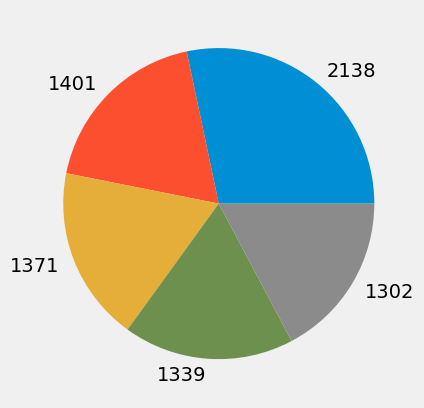

In [291]:
# Define a list of colors to use for the pie chart
colors = ['red','green','orange','white' ]

# Create a pie chart of the top 5 retweets
plt.pie(top_5['Number of Retweets'], labels=top_5['Number of Retweets'])

Text(0.5, 1.0, 'Five days with the highest Retweets')

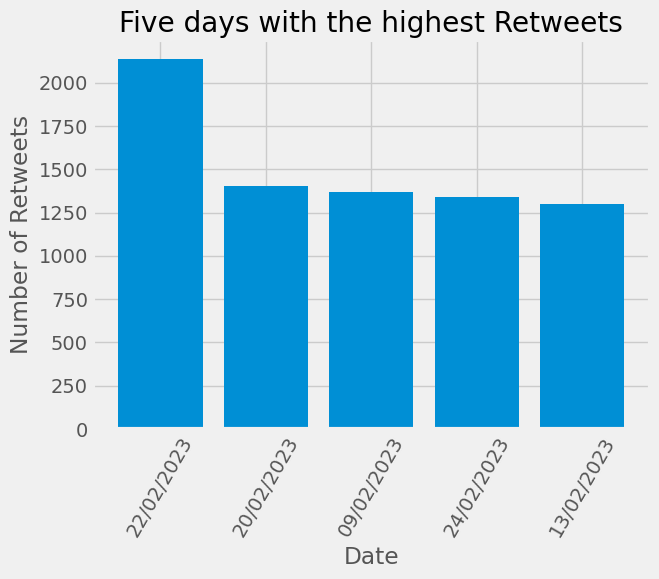

In [487]:
plt.bar(top_5.index, height=top_5['Number of Retweets'])

#Adjust date rotation in the x-axis
plt.xticks(rotation=60)

# Add x and y axis labels
plt.xlabel('Date')
plt.ylabel('Number of Retweets')

# Add a title to the pie chart
plt.title('Five days with the highest Retweets')

In [80]:
#Maximum number of Retweets
df['Number of Retweets'].max()

1182

In [326]:
#display matrix or shape of the data
df.shape

(3234, 16)

In [327]:
#Minimum number of Retweets
df['Number of Retweets'].min()

0

In [364]:
print(column)

0       Keir Starmer warns Brits soon worse off than P...
1       King Charles will meet EU's Ursula von der Ley...
2       Debate rages over airplane etiquette after Vir...
3       Paula Yates to be subject of new documentary c...
4       Turkey is hit by ANOTHER earthquake https://t....
                              ...                        
3229    Chinese spy balloon carried EXPLOSIVES to dest...
3230    'I had to breastfeed my HUSBAND': Mother recal...
3231    Rescuers dig with their bare hands as they wor...
3232    'Andrew Tate fined me for going out and strang...
3233    Grimes brands Grammy Awards 'irrelevant' https...
Name: Tweet, Length: 3234, dtype: object


In [494]:
# Extract the tweet column from the dataframe
column = df['Tweet']

# Split the tweets into individual words and count the frequency of each word
words = []
for string in column:
    words.extend(string.split())
word_counts = Counter(words)

# Sort the words by frequency
sorted_words = sorted(word_counts, key=word_counts.get, reverse=True)

# Select the top N words to display
N = 100
for word in sorted_words[:N]:
    # Check if the word count is greater than N
    if word_counts[word] > N:
        # Print the word and its count
        print(word, word_counts[word])

to 1119
in 862
the 811
of 790
a 607
and 589
for 548
is 469
after 383
her 352
with 349
on 339
as 317
at 309
his 296
by 232
from 225
Nicola 225
who 206
over 187
was 165
he 164
are 158
says 153
she 135
Bulley 135
out 125
be 120
The 116
reveals 103
will 101


In [506]:

# Extract the tweet column from the dataframe
data = df['Tweet']

# Split the tweets into individual words and create phrases of 3 words
words = []
for string in data:
    words.extend(string.split())
phrases = [f"{words[i]} {words[i+1]} {words[i+2]}" for i in range(len(words)-2)]

# Count the frequency of each phrase
phrases_count = Counter(phrases)

# Select the most common phrases that appear more than once
most_common = [phrase for phrase, count in phrases_count.items() if count > 1]
print(phrases_count, most_common)

Counter({'for Nicola Bulley': 29, 'alleyway sex act': 21, 'stabbed to death': 19, 'Harry and Meghan': 18, 'missing Nicola Bulley': 18, "Nicola Bulley's family": 16, "Nicola Bulley's disappearance": 16, 'for missing Nicola': 15, 'State of the': 15, 'of the Union': 15, 'Super Bowl halftime': 14, 'Bowl halftime show': 14, 'in hunt for': 13, 'hunt for missing': 13, 'to death in': 13, 'where Nicola Bulley': 13, 'the Super Bowl': 13, 'is set to': 12, 'Super Bowl performance': 12, 'to death by': 11, 'for the first': 11, 'of Nicola Bulley': 11, 'search for Nicola': 11, "of Nicola Bulley's": 11, 'shows off her': 10, 'pay tribute to': 10, 'Nicola Bulley and': 10, 'Super Bowl LVII': 10, 'step closer to': 9, 'break their silence': 9, 'Meghan and Harry': 9, 'Nicola Bulley was': 9, "Nicola Bulley's partner": 9, 'Nicola Bulley went': 9, 'Chinese spy balloon': 9, 'sex act video': 9, 'at Super Bowl': 9, 'I have a': 8, 'A look at': 8, 'over the years': 8, 'more than half': 8, 'in Super Bowl': 8, 'over t

In [505]:
column = df.Tweet

words=[]
for string in column:
    words.extend(string.split())


phrases = [f"{words[i]} {words[i+1]} {words[i+2]} {words[i+3]}" for i in range(len(words)-3)]

phrases_count = Counter(phrases)
most_common_phrases = [phrase for phrase, count in phrases_count.items() if count > 1]
           
print(phrases_count, most_common_phrases)





Counter({'for missing Nicola Bulley': 15, 'State of the Union': 15, 'Super Bowl halftime show': 14, 'search for Nicola Bulley': 11, 'in hunt for missing': 10, 'stabbed to death in': 10, 'hunt for missing Nicola': 9, 'where Nicola Bulley went': 9, 'alleyway sex act video': 9, 'one step closer to': 7, 'stabbed to death by': 7, 'for the first time': 7, 'Prince Harry and Meghan': 7, 'Harry and Meghan Markle': 7, 'and Meghan Markle finally': 7, 'Meghan Markle finally break': 7, 'Markle finally break their': 7, 'finally break their silence': 7, 'break their silence on': 7, 'their silence on THAT': 7, 'silence on THAT South': 7, 'on THAT South Park': 7, 'THAT South Park episode': 7, 'Outrage over trans women': 7, 'over trans women accepting': 7, 'trans women accepting tampon': 7, 'women accepting tampon endorsements': 7, "Joe Westerman's wife says": 7, "Westerman's wife says the": 7, 'wife says the thought': 7, 'says the thought of': 7, 'the thought of kissing': 7, 'thought of kissing him': 7

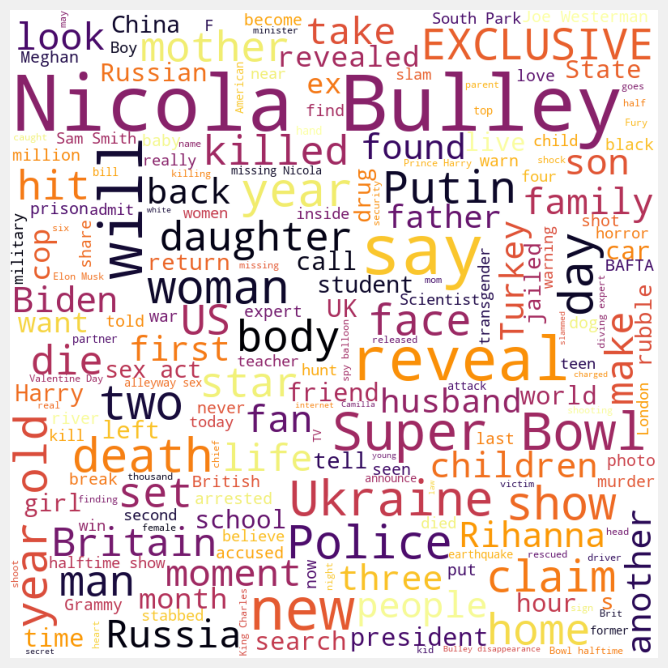

In [509]:
# Join all tweets in a single string
text = ' '.join(df['Tweet'])

# Define stop words to exclude from the word cloud
stop_words = ['five','co','https','t','U','one'] + list(STOPWORDS)

# Generate the word cloud with WordCloud library
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='inferno', stopwords=stop_words).generate(text)

# Plot the word cloud using matplotlib
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()